In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
from datetime import date, datetime, timedelta
import seaborn as sns

def load_pickle(filepath):
    with open(filepath, 'r') as f:
        name = pickle.load(f)
    return name

def picklify(obj, name):
    with open(name, 'w') as f:
        pickle.dump(obj, f)
    print('pickled')
    return

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
plt.style.use('fivethirtyeight')

In [3]:
df = load_pickle('../data/model_data.pkl')

In [4]:
df.head(1).T

,0
ActualElapsedTime,153
AirTime,137
ArrDelay,-12
ArrTime,1033
CRSArrTime,1045
CRSDepTime,700
CRSElapsedTime,165
CancellationCode,NaN
Cancelled,0
CarrierDelay,NaN


In [5]:
df = df.dropna(axis=0, subset=['Airport'])

In [6]:
cols_to_int = ['wint_hol_1day', 'wint_hol_2day', 'fri_bef_mon_holiday']

In [7]:
for c in cols_to_int:
    df[c] = df[c].astype(int)

In [8]:
df['right'] = (df.DepDelay >= -3)

In [9]:
df['right'].value_counts()

True     542834
False    276923
Name: right, dtype: int64

In [10]:
# Test logistic regression predictor of left / right
y = df.ix[:, ['right']]
X = df.ix[:, ['AirTime', 'DayOfWeek', 'DayofMonth', 'Month', 'Year', 'CRSDepTime',
              'lat', 'long', 'DepDelayr', 'AvgArrDelay',
              'wint_hol_1day', 'wint_hol_2day', 'fri_bef_mon_holiday']]

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/Users/cf/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve, auc

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
lm = LogisticRegression(verbose=1)

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
lm.classes_

In [ ]:
predictions = lm.predict(X_test)

In [40]:
accuracy_score(predictions, y_test)

NameError: name 'predictions' is not defined

In [41]:
def plot_roc(modelname):
    predicted_probs = modelname.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, predicted_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4,4))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc="lower right")
    plt.show()
    return

In [ ]:
plot_roc(lm)

In [ ]:
recall_score(predictions, y_test)

In [ ]:
precision_score(predictions, y_test)

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, predicted_probs[:, 1])
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(4,4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Try gradient boosted

In [42]:
from sklearn import ensemble
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split

In [43]:
# Fit classifier with out-of-bag estimates
params = {'n_estimators': 130, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.3, 'min_samples_leaf': 1, 'random_state': 3, 'verbose': 1}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

/Users/cf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2558           0.0239            1.49m
         2           1.2403           0.0134            1.44m
         3           1.2327           0.0085            1.41m
         4           1.2254           0.0051            1.39m
         5           1.2216           0.0038            1.38m
         6           1.2212           0.0028            1.41m
         7           1.2185           0.0021            1.45m
         8           1.2165           0.0038            1.49m
         9           1.2126           0.0019            1.47m
        10           1.2121           0.0015            1.45m
        20           1.2018           0.0009            1.33m
        30           1.1934           0.0002            1.16m
        40           1.1906           0.0007            1.02m
        50           1.1902           0.0003           53.75s
        60           1.1865           0.0000           46.89s
       

In [44]:
predicted_prob = clf.predict_proba(X_test)
predicted_gbc = clf.predict(X_test)

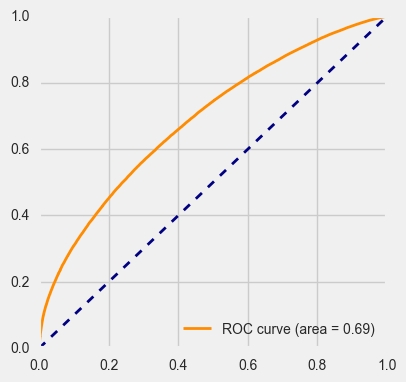

In [51]:
plot_roc(clf)

In [46]:
recall_score(predicted_gbc, y_test)

0.69589087023028728

In [47]:
precision_score(predicted_gbc, y_test)

0.92636500064156568

In [386]:
for c, f in zip(X_train.columns, clf.feature_importances_):
    print(c, f)

AirTime 0.099451033581
DayOfWeek 0.0517125994429
DayofMonth 0.0599614584582
Month 0.143839039167
Year 0.105275139778
CRSDepTime 0.166130110315
lat 0.0582011869822
long 0.0678165581024
DepDelayr 0.18157050783
AvgArrDelay 0.0545488004776
wint_hol_1day 0.0038066393199
wint_hol_2day 0.00251170338361
fri_bef_mon_holiday 0.00517522316151


In [15]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

Convenience plot with ``partial_dependence_plots``


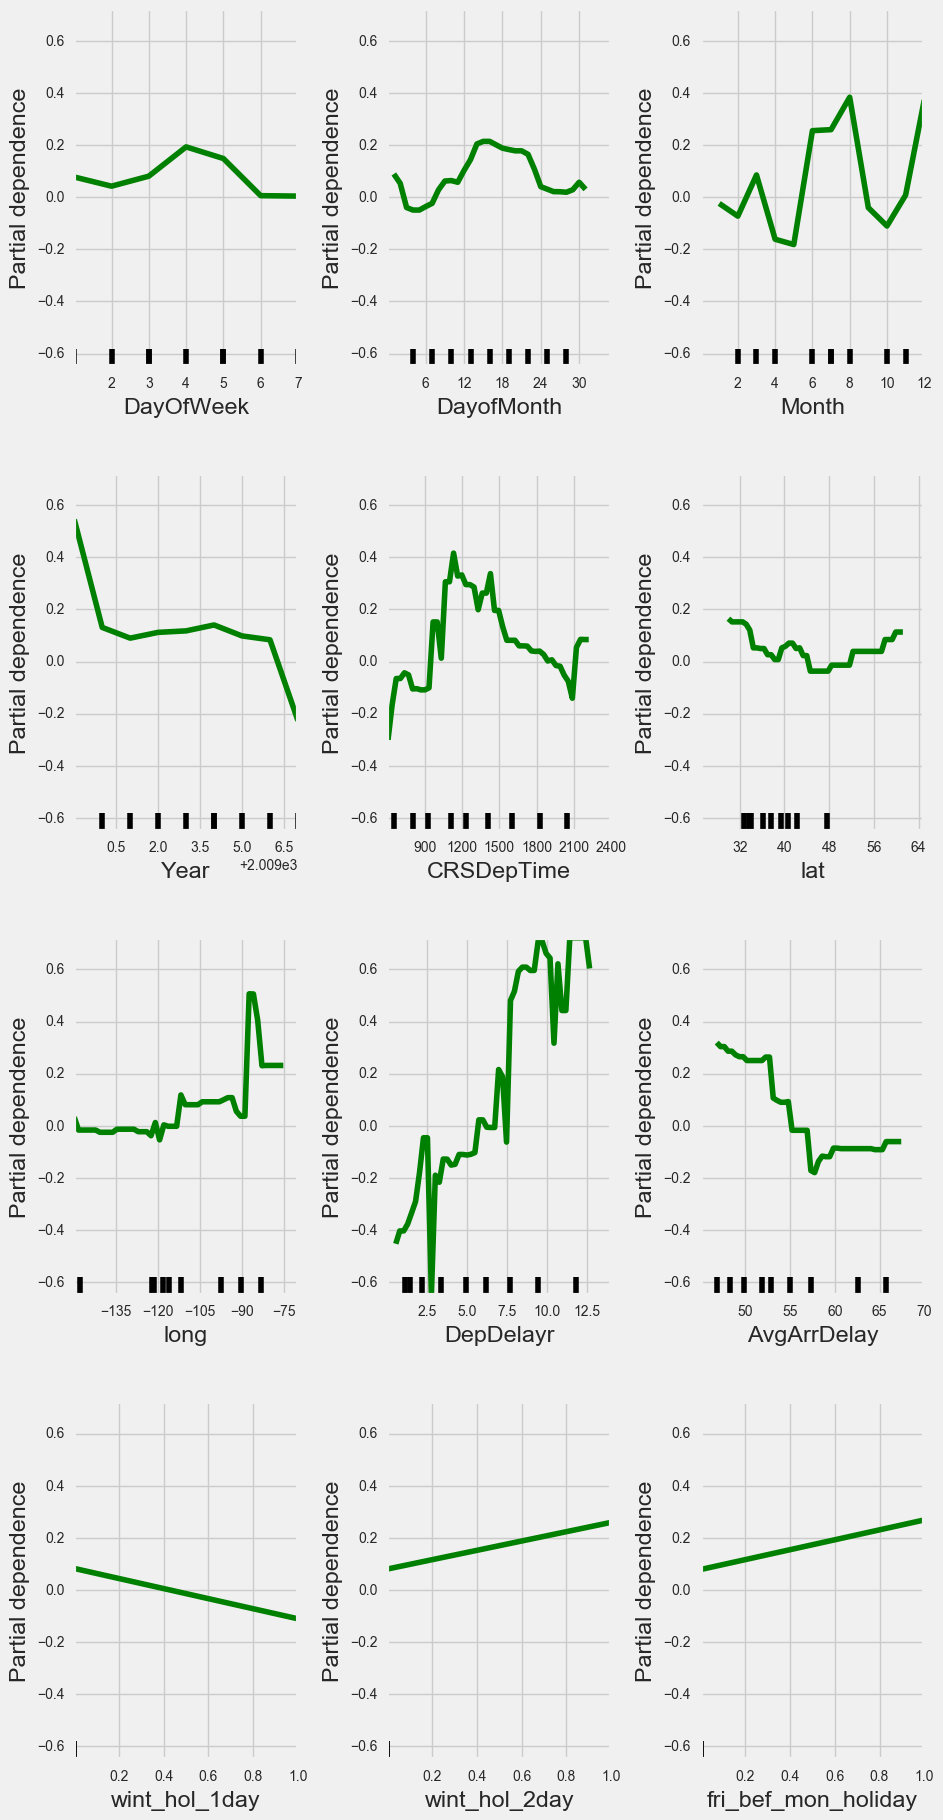

In [395]:
print('Convenience plot with ``partial_dependence_plots``')

features = range(1, len(X.columns))
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=X.columns,
                                   n_jobs=3, grid_resolution=50, figsize=(10,10))


plt.subplots_adjust(top=1.9)  # tight_layout causes overlap with suptitle

In [404]:
feature_importances = 100*clf.feature_importances_ / np.sum(clf.feature_importances_)
feature_importances, feature_names, feature_idxs = zip(*sorted(zip(feature_importances, X_train.columns, range(len(X_train.columns)))))

In [408]:
from sklearn.ensemble.partial_dependence import partial_dependence

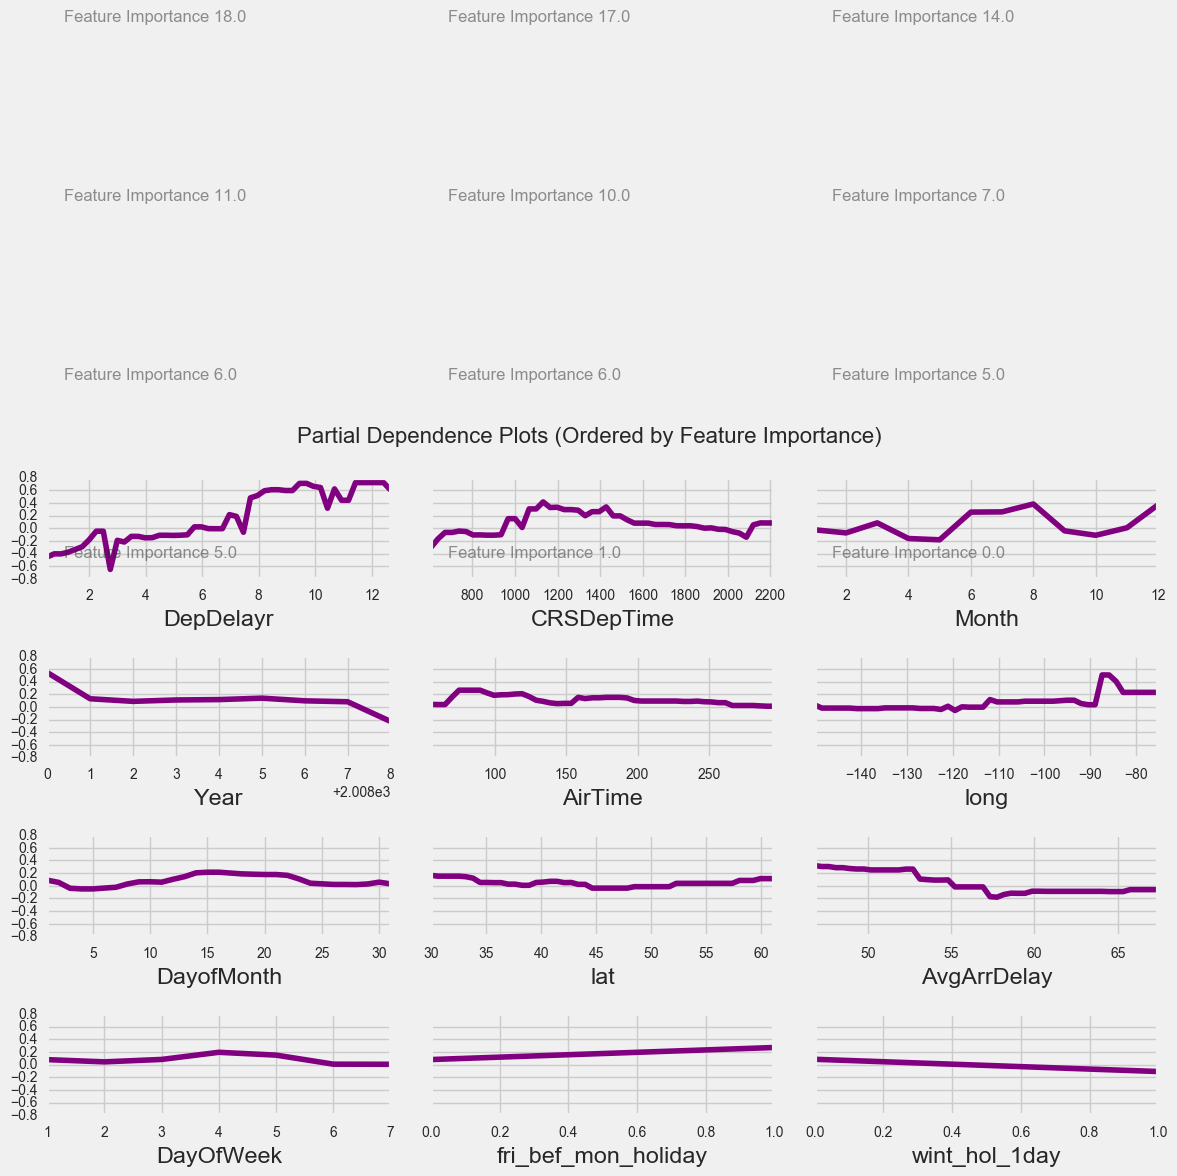

In [415]:
# This kind of sucks
N_COLS = 3
fimportances = list(reversed(feature_importances))
fnames = list(reversed(feature_names))

pd_plots = [partial_dependence(clf, target_feature, X=X_train, grid_resolution=50)
            for target_feature in feature_idxs]
pd_plots = list(reversed(zip([pdp[0][0] for pdp in pd_plots], [pdp[1][0] for pdp in pd_plots])))

fig, axes = plt.subplots(nrows=4, ncols=N_COLS, sharey=True, 
                         figsize=(12.0, 8.0))

for i, (y_axis, x_axis) in enumerate(pd_plots[0:(4*N_COLS)]):
    ax = axes[i/N_COLS, i%N_COLS]
    ax.plot(x_axis, y_axis, color="purple")
    ax.set_xlim([np.min(x_axis), np.max(x_axis)])
    text_x_pos = np.min(x_axis) + 0.05*(np.max(x_axis) - np.min(x_axis))
    ax.text(text_x_pos, 8,
            "Feature Importance " + str(round(fimportances[i], )), 
            fontsize=12, alpha=0.5)
    ax.set_xlabel(fnames[i])
    
plt.suptitle("Partial Dependence Plots (Ordered by Feature Importance)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.savefig('plots/patial-dependence-plots.png', bbox_inches='tight')

In [58]:
picklify(clf, '../data/good_minus3_split_model.pkl')

pickled


In [ ]:
X['model_predicted'] = clf.predict_proba(X)[:,1]

In [59]:
X_positive = X.ix[y['right'] == 1, :]

In [60]:
X_positive = pd.concat((X_positive, pd.get_dummies(X_positive['DayOfWeek'], prefix='dayoweek', drop_first=True)), axis=1)
X_positive = pd.concat((X_positive, pd.get_dummies(X_positive['Month'], prefix='mo', drop_first=True)), axis=1)
X_positive = pd.concat((X_positive, pd.get_dummies(X_positive['DayofMonth'], prefix='dayomo', drop_first=True)), axis=1)
X_positive = X_positive.drop(['DayOfWeek', 'Month', 'DayofMonth'], axis=1)

In [486]:
dummy_cols = ['DayOfWeek', 'Month', 'DayofMonth']

def dummdumm(dfm, cols):
    for c in cols:
        print(pd.concat((dfm, pd.get_dummies(dfm[c], prefix='d_', drop_first=True)), axis=1))
    for c in cols: 
        dfm = dfm.drop([c], axis=1)
    return dfm

In [61]:
X_positive.head()

,AirTime,Year,CRSDepTime,lat,long,DepDelayr,AvgArrDelay,wint_hol_1day,wint_hol_2day,fri_bef_mon_holiday,...,dayomo_22,dayomo_23,dayomo_24,dayomo_25,dayomo_26,dayomo_27,dayomo_28,dayomo_29,dayomo_30,dayomo_31
0,137.0,2008,700.0,35.040222,-106.609194,7.659206,48.535000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,135.0,2008,1545.0,35.040222,-106.609194,7.659206,48.535000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,219.0,2008,1205.0,36.124477,-86.678182,11.928683,53.656667,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,55.0,2008,615.0,43.564444,-116.222778,8.823368,51.810000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,131.0,2008,1740.0,39.858408,-104.667002,9.249920,57.106667,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
y_positive = df.ix[df['right'] == 1, ['DepDelay']]

In [63]:
y_positive['DepDelay_adj'] = y_positive['DepDelay'] + 4

In [64]:
from __future__ import print_function
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [ ]:
# formula = 'DepDelay ~ AirTime + DayOfWeek + DayofMonth + Month + Year + CRSDepTime + \
#               lat + long + wint_hol_1day + wint_hol_2day + fri_bef_mon_holiday + const'
# dta = X_positive
# dta['DepDelay'] = y_positive

In [65]:
y_positive_actual = y_positive['DepDelay_adj']
y_positive_actual.describe()

count    542834.000000
mean         15.283641
std          33.678512
min           1.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1968.000000
Name: DepDelay_adj, dtype: float64

In [66]:
X_positive = sm.add_constant(X_positive)

In [67]:
X_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542834 entries, 0 to 820415
Data columns (total 58 columns):
const                  542834 non-null float64
AirTime                542834 non-null float64
Year                   542834 non-null int64
CRSDepTime             542834 non-null float64
lat                    542834 non-null float64
long                   542834 non-null float64
DepDelayr              542834 non-null float64
AvgArrDelay            542834 non-null float64
wint_hol_1day          542834 non-null int64
wint_hol_2day          542834 non-null int64
fri_bef_mon_holiday    542834 non-null int64
dayoweek_2             542834 non-null float64
dayoweek_3             542834 non-null float64
dayoweek_4             542834 non-null float64
dayoweek_5             542834 non-null float64
dayoweek_6             542834 non-null float64
dayoweek_7             542834 non-null float64
mo_2                   542834 non-null float64
mo_3                   542834 non-null float64
mo_4

In [99]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_positive, y_positive, test_size=0.33)

In [100]:
gamm_log = sm.GLM(y_train_p['DepDelay_adj'], X_train_p, family=sm.families.Gamma(sm.families.links.log))
gamm_log_results = gamm_log.fit()
print(gamm_log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           DepDelay_adj   No. Observations:               363698
Model:                            GLM   Df Residuals:                   363640
Model Family:                   Gamma   Df Model:                           57
Link Function:                    log   Scale:                   4.81235904149
Method:                          IRLS   Log-Likelihood:            -1.4528e+06
Date:                Mon, 21 Nov 2016   Deviance:                   6.3942e+05
Time:                        14:18:06   Pearson chi2:                 1.75e+06
No. Iterations:                    10                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -52.7764      3.243    -16.274      0.000     -59.132     -46.420
AirTime                -0

In [101]:
nobs = gamm_log_results.nobs
yhat = gamm_log_results.predict(X_test_p)

In [ ]:
tst = gamm_log_results.predict(X_positive.drop(['index'], axis=1))

In [ ]:
tst[0:80]

In [ ]:
y_ind = y_positive_actual >= 18

from statsmodels.graphics.api import abline_plot

In [ ]:
fig, ax = plt.subplots()
ax.scatter(yhat, y_positive_actual, c=y_ind)
line_fit = sm.OLS(y_positive_actual, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [ ]:
fig, ax = plt.subplots()

ax.scatter(yhat, gamm_log_results.resid_pearson, marker='o', facecolors='none', edgecolors='blue', alpha=0.5)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

In [ ]:
from scipy import stats

fig, ax = plt.subplots()

resid = gamm_log_results.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=200)
ax.set_title('Histogram of standardized deviance residuals');

In [ ]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

In [103]:
yhat_s = pd.Series(yhat)

In [104]:
(yhat_s - 4).describe()

count    179136.000000
mean         11.354322
std           6.203091
min           1.149642
25%           7.344663
50%          10.158014
75%          14.073808
max         987.673533
dtype: float64

In [107]:
(y_test_p['DepDelay_adj'] - 4).describe()

count    179136.000000
mean         11.222406
std          33.729884
min          -3.000000
25%          -2.000000
50%           1.000000
75%          10.000000
max        1964.000000
Name: DepDelay_adj, dtype: float64

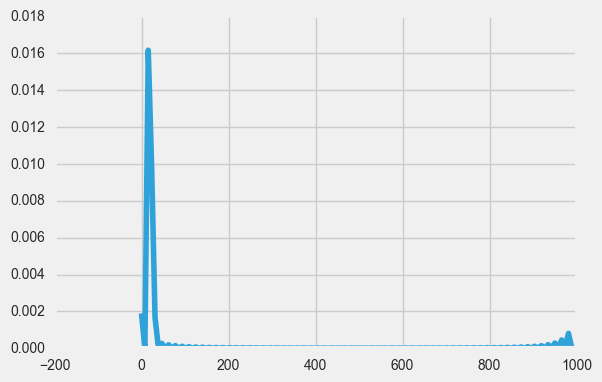

In [109]:
sns.kdeplot(yhat_s - 4)

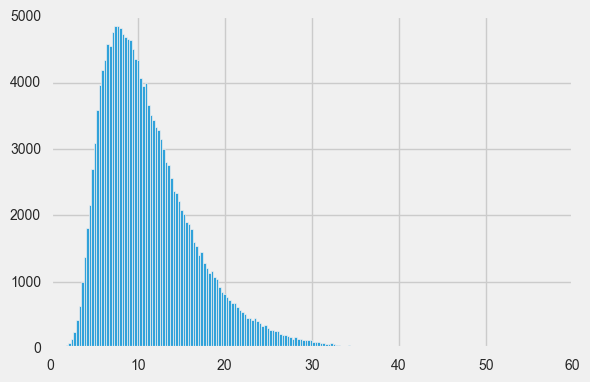

In [110]:
(yhat_s[yhat_s < 140] - 4).hist(bins=200)

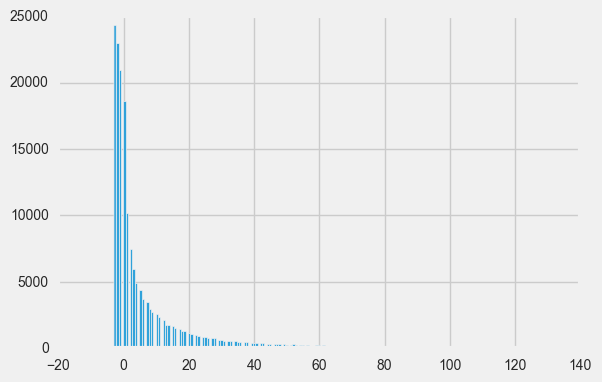

In [259]:
(y_test_p.ix[y_test_p['DepDelay'] < 140, 'DepDelay']).hist(bins=200)

In [115]:
X_negative = X.ix[y['right'] == 0, :]

In [116]:
X_negative = pd.concat((X_negative, pd.get_dummies(X_negative['DayOfWeek'], prefix='dayoweek', drop_first=True)), axis=1)
X_negative = pd.concat((X_negative, pd.get_dummies(X_negative['Month'], prefix='mo', drop_first=True)), axis=1)
X_negative = pd.concat((X_negative, pd.get_dummies(X_negative['DayofMonth'], prefix='dayomo', drop_first=True)), axis=1)
X_negative = X_negative.drop(['DayOfWeek', 'Month', 'DayofMonth'], axis=1)

In [193]:
X_negative = sm.add_constant(X_negative)
X_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276923 entries, 3 to 820418
Data columns (total 58 columns):
const                  276923 non-null float64
AirTime                276923 non-null float64
Year                   276923 non-null int64
CRSDepTime             276923 non-null float64
lat                    276923 non-null float64
long                   276923 non-null float64
DepDelayr              276923 non-null float64
AvgArrDelay            276923 non-null float64
wint_hol_1day          276923 non-null int64
wint_hol_2day          276923 non-null int64
fri_bef_mon_holiday    276923 non-null int64
dayoweek_2             276923 non-null float64
dayoweek_3             276923 non-null float64
dayoweek_4             276923 non-null float64
dayoweek_5             276923 non-null float64
dayoweek_6             276923 non-null float64
dayoweek_7             276923 non-null float64
mo_2                   276923 non-null float64
mo_3                   276923 non-null float64
mo_4

In [118]:
y_negative = df.ix[df['right'] == 0, ['DepDelay']]

In [256]:
y_negative_adj = (-y_negative) - 3

In [209]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_negative, y_negative_adj, test_size=0.33)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x193ab0610>]], dtype=object)

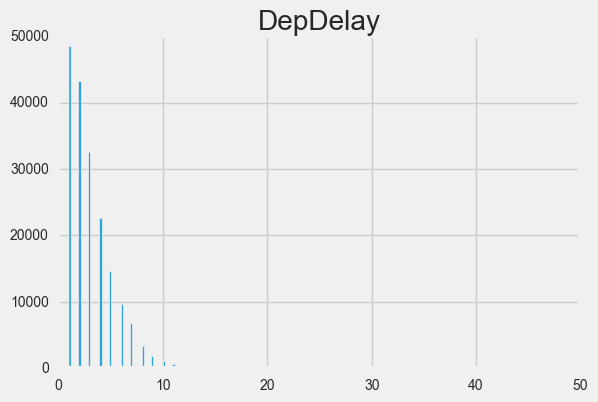

In [210]:
y_train_n.hist(bins=200)

In [211]:
y_train_n.describe()

,DepDelay
count,185538.000000
mean,3.083282
std,2.123411
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,46.000000


In [212]:
gamm_log_neg = sm.GLM(y_train_n, X_train_n, family=sm.families.Gamma(sm.families.links.log))
gamm_log_results_neg = gamm_log_neg.fit()
print(gamm_log_results_neg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               DepDelay   No. Observations:               185538
Model:                            GLM   Df Residuals:                   185480
Model Family:                   Gamma   Df Model:                           57
Link Function:                    log   Scale:                  0.460596209415
Method:                          IRLS   Log-Likelihood:            -3.6076e+05
Date:                Mon, 21 Nov 2016   Deviance:                       80292.
Time:                        15:24:03   Pearson chi2:                 8.54e+04
No. Iterations:                     6                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -37.9950      1.391    -27.307      0.000     -40.722     -35.268
AirTime              1.96

In [213]:
nobs_neg = gamm_log_results_neg.nobs
yhat_neg = gamm_log_results_neg.mu

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1f435cf50>]], dtype=object)

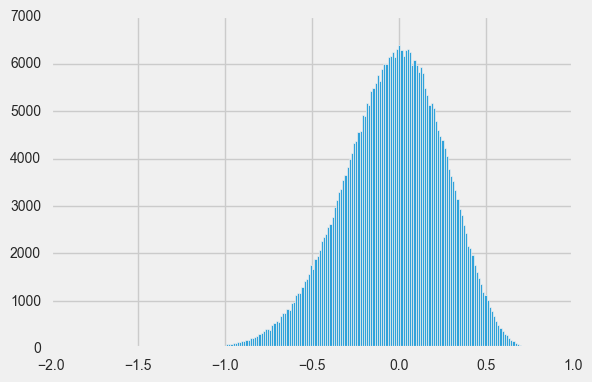

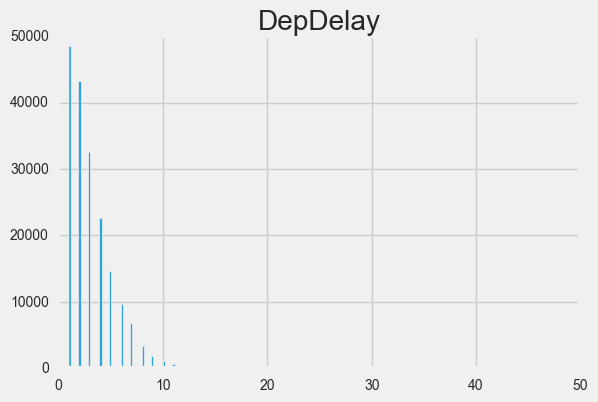

In [377]:
pd.Series(yhat_neg[yhat_neg < 40]).hist(bins=200)
y_train_n.hist(bins=200)

In [215]:
pd.Series(yhat_neg).describe()

count    185538.000000
mean          3.083186
std           0.290887
min           2.106503
25%           2.877430
50%           3.069164
75%           3.272545
max           4.540267
dtype: float64

In [378]:
y_train_n.describe()

,DepDelay
count,185538.000000
mean,3.083282
std,2.123411
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,46.000000


In [241]:
y = df.ix[:, ['right', 'DepDelay']]

In [242]:
# Test overall pipeline:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.45)

In [364]:
# Stages - run classification task predictions
probs_clf = clf.predict_proba(X_test_f)
preds_clf = clf.predict(X_test_f)

In [365]:
probs_clf

array([[ 0.15762608,  0.84237392],
       [ 0.37658901,  0.62341099],
       [ 0.14829661,  0.85170339],
       ..., 
       [ 0.08132365,  0.91867635],
       [ 0.39357551,  0.60642449],
       [ 0.29516449,  0.70483551]])

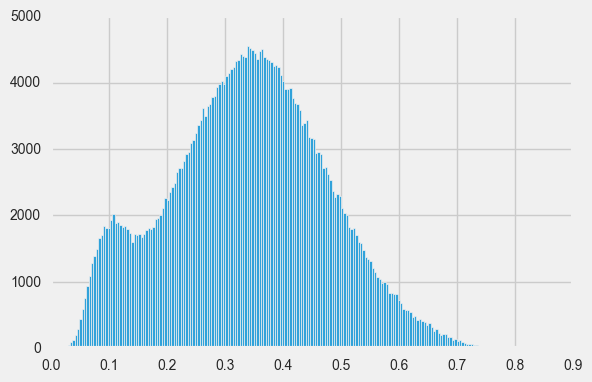

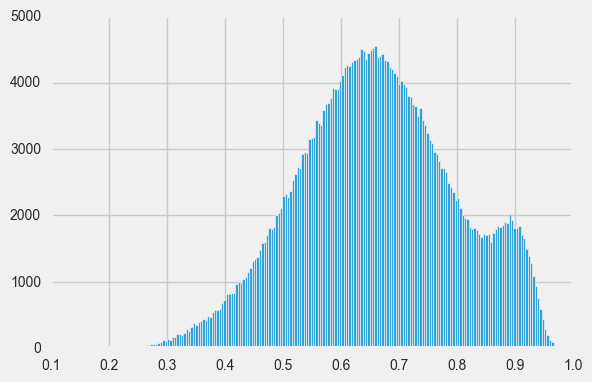

In [376]:
pd.Series(probs_clf[:, 0]).hist(bins=200)
plt.show()
pd.Series(probs_clf[:, 1]).hist(bins=200)
plt.show()

In [245]:
clf.classes_

array([False,  True], dtype=bool)

In [366]:
# Engineer features for further modeling
X_test_ns = dummify(X_test_f, dummy_cols)
X_test_ns = sm.add_constant(X_test_ns)

In [367]:
# Generate predictions from both models
yhat_pos = gamm_log_results.predict(X_test_ns)
yhat_neg = gamm_log_results_neg.predict(X_test_ns)

In [368]:
# un-transform outputs from both models
yhat_pos = yhat_pos - 4
yhat_neg = (-yhat_neg) + 3

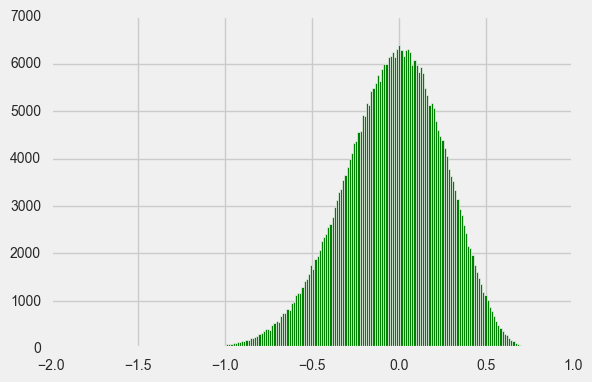

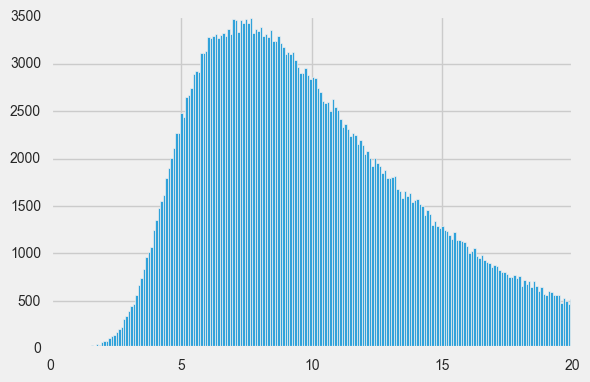

In [373]:
# Sanity checks
yhat_neg.hist(bins=200, color='green')
plt.show()
yhat_pos[yhat_pos < 20].hist(bins=200)
plt.show()

In [370]:
yhat_pos_weighted = yhat_pos * probs_clf[:,1]
yhat_neg_weighted = yhat_neg * probs_clf[:,0]

In [371]:
y_final = yhat_pos_weighted + yhat_neg_weighted

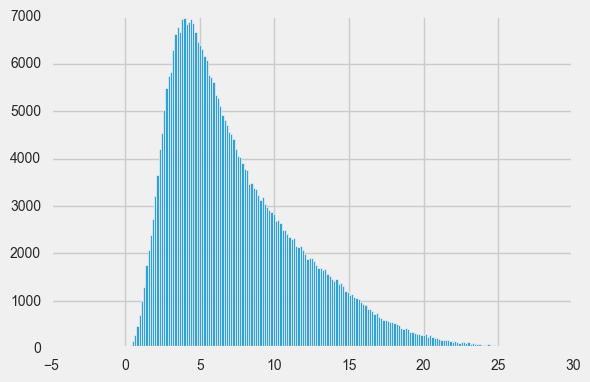

In [372]:
y_final[y_final < 30].hist(bins=200)

In [380]:
y_final.describe()

count    368891.000000
mean          7.470737
std           4.757162
min          -0.009993
25%           4.066570
50%           6.295286
75%           9.923779
max         480.031354
dtype: float64

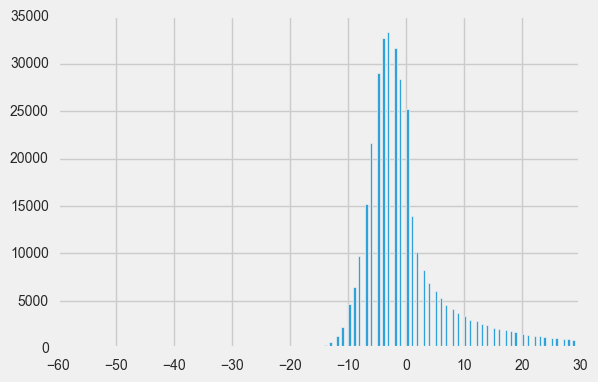

In [355]:
y_test_f.ix[y_test_f['DepDelay'] < 30, 'DepDelay'].hist(bins=200)

In [379]:
y_test_f['DepDelay'].describe()

count    368891.000000
mean          5.380579
std          28.332945
min         -54.000000
25%          -4.000000
50%          -2.000000
75%           4.000000
max        1964.000000
Name: DepDelay, dtype: float64

In [356]:
y_final.name = 'Predicted_delay'

In [357]:
y_test_f.shape

(368891, 2)

In [358]:
y_test_final = y_test_f.reset_index().ix[:, ['DepDelay']]
    

In [359]:
results = pd.concat([y_test_final, y_final.reset_index()['Predicted_delay']], axis=1)

In [360]:
from sklearn.metrics import mean_squared_error
import math

In [361]:
math.sqrt(mean_squared_error(results['DepDelay'], results['Predicted_delay']))

27.972829315153373

In [425]:
results.sort_values('Predicted_delay', ascending=True).iloc[0:50,:]

,DepDelay,Predicted_delay
27766,-1.0,-0.009993
96086,-11.0,0.005896
272063,-3.0,0.042246
300285,-6.0,0.098477
141619,-7.0,0.152559
321378,-7.0,0.170098
18813,-7.0,0.179572
53463,-9.0,0.183092
112056,2.0,0.187566
235545,-6.0,0.191332


In [422]:
X_test_ns.iloc[278920,:]

const                     1.000000
AirTime                 150.000000
Year                   2015.000000
CRSDepTime             1800.000000
lat                      33.434167
long                   -112.008056
DepDelayr                86.500000
AvgArrDelay              49.798333
wint_hol_1day             0.000000
wint_hol_2day             0.000000
fri_bef_mon_holiday       0.000000
DayOfWeekdum_2            0.000000
DayOfWeekdum_3            0.000000
DayOfWeekdum_4            1.000000
DayOfWeekdum_5            0.000000
DayOfWeekdum_6            0.000000
DayOfWeekdum_7            0.000000
Monthdum_2                0.000000
Monthdum_3                0.000000
Monthdum_4                0.000000
Monthdum_5                0.000000
Monthdum_6                0.000000
Monthdum_7                0.000000
Monthdum_8                0.000000
Monthdum_9                0.000000
Monthdum_10               0.000000
Monthdum_11               0.000000
Monthdum_12               0.000000
DayofMonthdum_2     

In [435]:
xt = 3.00

In [442]:
yt = [np.random.exponential(xt) for i in range(0,10000)]

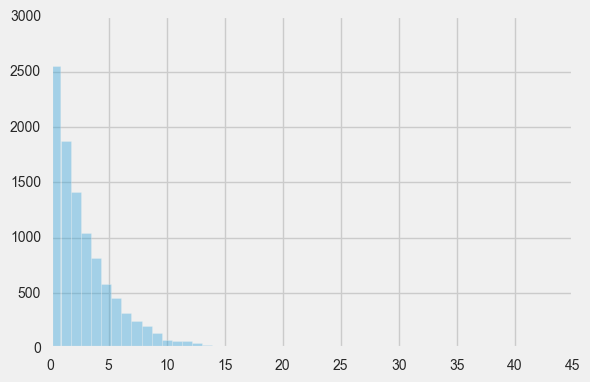

In [443]:
sns.distplot(np.array(yt), kde=False)

In [444]:
from scipy.stats import expon

In [489]:
def conf_intervals(X_point, left_bound, right_bound):
    X_point = pd.DataFrame(X_point).T
    probs = (clf.predict_proba(X_point))
    print(X_point)
    print(dummdumm(X_point, dummy_cols))
#     X_t = sm.add_constant(X_t)
#     print(X_t)
    
#     yhat_positive = gamm_log_results.predict(X_t)
#     yhat_negative = gamm_log_results_neg.predict(X_t)
    
#     pos_left, pos_right = expon.ppf(left_bound, 0, yhat_positive), expon.ppf(right_bound, 0, yhat_positive)
    
#     print(yhat_positive, pos_left, pos_right)
    
    

In [490]:
conf_intervals(X_test_f.iloc[4, :], 0.1, 0.9)

       AirTime  DayOfWeek  DayofMonth  Month    Year  CRSDepTime     lat  \
33394    124.0        4.0        24.0   12.0  2009.0       700.0  34.056   

             long  DepDelayr  AvgArrDelay  wint_hol_1day  wint_hol_2day  \
33394 -117.601194   1.476184    48.298333            1.0            0.0   

       fri_bef_mon_holiday  
33394                  0.0  
       AirTime  DayOfWeek  DayofMonth  Month    Year  CRSDepTime     lat  \
33394    124.0        4.0        24.0   12.0  2009.0       700.0  34.056   

             long  DepDelayr  AvgArrDelay  wint_hol_1day  wint_hol_2day  \
33394 -117.601194   1.476184    48.298333            1.0            0.0   

       fri_bef_mon_holiday  
33394                  0.0  
       AirTime  DayOfWeek  DayofMonth  Month    Year  CRSDepTime     lat  \
33394    124.0        4.0        24.0   12.0  2009.0       700.0  34.056   

             long  DepDelayr  AvgArrDelay  wint_hol_1day  wint_hol_2day  \
33394 -117.601194   1.476184    48.298333       

In [491]:
X_test_f.iloc[4, :]

AirTime                 124.000000
DayOfWeek                 4.000000
DayofMonth               24.000000
Month                    12.000000
Year                   2009.000000
CRSDepTime              700.000000
lat                      34.056000
long                   -117.601194
DepDelayr                 1.476184
AvgArrDelay              48.298333
wint_hol_1day             1.000000
wint_hol_2day             0.000000
fri_bef_mon_holiday       0.000000
Name: 33394, dtype: float64